### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [2]:
df = pd.read_csv('Ads_CTR_Optimisation.csv')

### Implementing UCB

In [3]:
import math

N = df.shape[0]
d = df.shape[1]
ads_selected = []
numbers_of_selections = [1] * d
sums_of_rewards = [0] * d
total_reward = 0

for n in range(N):
    ad = 0
    max_upper_bound = 0
    for i in range(d):
        average_reward = sums_of_rewards[i] / numbers_of_selections[i]
        delta_i = math.sqrt(3/2 * math.log(n+1) / numbers_of_selections[i])
        upper_bound = average_reward + delta_i
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = df.iloc[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

### Visualising the results

Text(0, 0.5, 'Number of times each ad was selected by the algorithm')

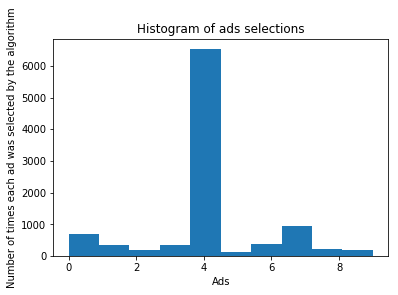

In [4]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected by the algorithm')

In [5]:
from collections import Counter
Counter(ads_selected)

Counter({0: 695,
         1: 353,
         2: 204,
         3: 339,
         4: 6527,
         5: 140,
         6: 381,
         7: 937,
         8: 231,
         9: 193})